<a href="https://colab.research.google.com/github/apooravm/pyTorch-nbs/blob/main/CNN_MNIST_nums.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import torch
import torch.nn as nn
from torch.utils.data import DataLoader
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import torch.nn.functional as F
import matplotlib.pyplot as plt
import numpy as np

In [45]:
device = "cuda" if torch.cuda.is_available() else "cpu"

In [155]:
dataset_transform = transforms.Compose([
    transforms.Resize(size=(28, 28)),
    transforms.ToTensor(),
])
train_dataset = datasets.MNIST(root='dataset/', train=True, transform=dataset_transform, download=True)
test_dataset = datasets.MNIST(root='dataset/', transform=dataset_transform, download=True)

BATCH_SIZE = 64
train_dataloader = DataLoader(dataset=train_dataset, batch_size=BATCH_SIZE, shuffle=True)
test_dataloader = DataLoader(dataset=test_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [156]:
classes = train_dataloader.dataset.class_to_idx
classes

{'0 - zero': 0,
 '1 - one': 1,
 '2 - two': 2,
 '3 - three': 3,
 '4 - four': 4,
 '5 - five': 5,
 '6 - six': 6,
 '7 - seven': 7,
 '8 - eight': 8,
 '9 - nine': 9}

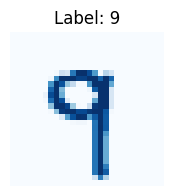

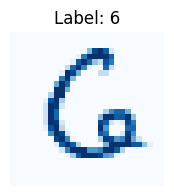

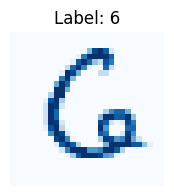

In [157]:
for _ in range(3):
  image, label = train_dataset[np.random.randint(0, 1000)]
  plt.figure(figsize=(3, 2))
  plt.imshow(image.squeeze(), cmap=plt.cm.Blues)
  plt.title(f"Label: {label}")
  plt.axis(False);

In [158]:
len(train_dataset)

60000

In [159]:
class MNIST_num_Classifier(nn.Module):
  def __init__(self, in_channels=1, hidden_units=10, output_classes=len(classes)):
    super().__init__()
    self.conv1 = nn.Conv2d(in_channels=in_channels, out_channels=hidden_units, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.pool = nn.MaxPool2d(kernel_size=(2, 2), stride=(2, 2))
    self.conv2 = nn.Conv2d(in_channels=hidden_units, out_channels=hidden_units, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    self.fullyConnectedLayer = nn.Linear(10*7*7, output_classes) # Fully connected layer
  def forward(self, x):
    x = F.relu(self.conv1(x))
    x = self.pool(x)
    x = F.relu(self.conv2(x))
    x = self.pool(x)
    x = x.reshape(x.shape[0], -1)
    x = self.fullyConnectedLayer(x)
    return x

In [160]:
model_0 = MNIST_num_Classifier().to(device)
x = torch.randn(64, 1, 28, 28).to(device)
model_0(x).shape

torch.Size([64, 10])

In [161]:
EPOCHS = 1
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), lr=0.01)
loss_arr = []

for epoch in range(EPOCHS):
  for batch_idx, (data, target) in enumerate(train_dataloader):
    model_0.train()
    data = data.to(device)
    target = target.to(device)

    preds = model_0(data)
    loss = criterion(preds, target)
    loss_arr.append(loss)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

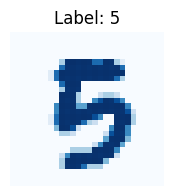

In [191]:
image, label = train_dataset[np.random.randint(0, 1000)]
plt.figure(figsize=(3, 2))
plt.imshow(image.squeeze(), cmap=plt.cm.Blues)
plt.title(f"Label: {label}")
plt.axis(False);

In [192]:
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(image.unsqueeze(0).to(device))
y_pred.argmax().item()

5

In [199]:
def getAccuracy(model, test_dataloader):
  correct = 0
  model_0.eval()
  for data, target in test_dataloader:
    data = data.to(device)
    target = target.to(device)
    with torch.inference_mode():
      pred = model_0(data.unsqueeze(0).to(device))
      if pred.argmax().item() == target:
        correct += 1
  print("Model Accuracy")
  print(f"{correct} correct out of {len(test_dataloader)} | {(correct/len(test_dataloader))*100}%")

In [200]:
getAccuracy(model_0, test_dataloader)

RuntimeError: ignored

1

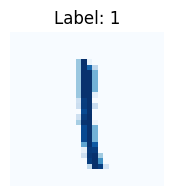

In [210]:
image, label = test_dataset[np.random.randint(0, 1000)]
plt.figure(figsize=(3, 2))
plt.imshow(image.squeeze(), cmap=plt.cm.Blues)
plt.title(f"Label: {label}")
plt.axis(False);
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(image.unsqueeze(0).to(device))
y_pred.argmax().item()

In [211]:
test_dataloader[0]

TypeError: ignored

In [164]:
from PIL import Image
import PIL

In [165]:
img = Image.open('./pixelImage.png')
img = PIL.ImageOps.grayscale(img)
transformed_image = dataset_transform(img)
transformed_image.shape

torch.Size([1, 28, 28])

In [166]:
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(transformed_image.unsqueeze(0).to(device))
y_pred.argmax().item()

8

In [172]:
hand_drawn = Image.open('./handdrawn_6.jpg')

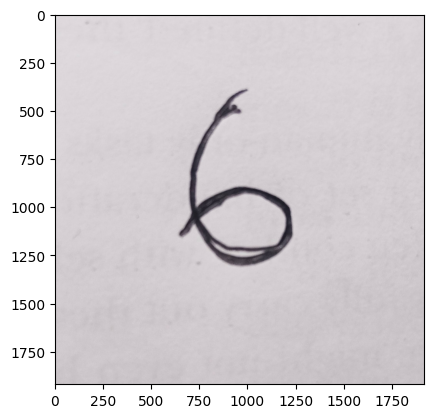

In [173]:
plt.imshow(hand_drawn)

In [174]:
hand_drawn = PIL.ImageOps.grayscale(hand_drawn)
img_hand = dataset_transform(hand_drawn)
img_hand.shape

torch.Size([1, 28, 28])

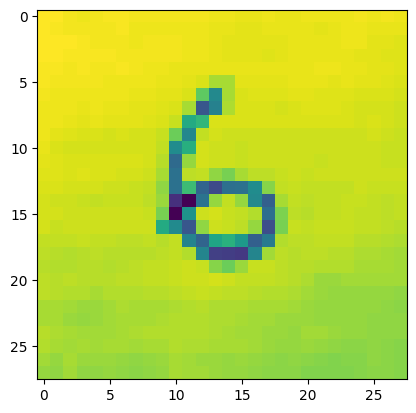

In [175]:
plt.imshow(img_hand.permute(1, 2, 0))

In [184]:
model_0.eval()
with torch.inference_mode():
  y_pred = model_0(img_hand.unsqueeze(0).to(device))
y_pred.argmax().item()

3